<a href="https://colab.research.google.com/github/Gogalino/Transcriptomics/blob/main/HW3_Linovskiy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop #5. Basics of `scanpy`

Firstly, let's install necessary Python packages.

In [ ]:
!pip install scanpy[leiden] scrublet
!gdown "1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t"
!unzip PBMC_10k.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 49.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552447 sha256=a59497181921544312c5e384f5f4e7a96b5d9aa1cb2782cbdc9b4fb97ce4655a
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy
Downloading...
From: https://drive.google.com/uc?id=1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t
To: /content/PBMC_10k.zip
100% 345M/345M [00:04<00:00, 84.3MB/s]
Archive:  PBMC_10k.zip
  inflating: filtered_feature_bc_matrix.h5  
  inflating: filtered_feature_bc_matrix.tar.gz  
  inflating: metrics_summary.csv     
  inflating: raw_feature_bc_matrix.h5  
  inflating: raw_feature_bc_matrix.tar.gz  
  inflating: web_summary

## AnnData

In [ ]:
import scanpy as sc
import seaborn as sns
import numpy as np

# `verbosity = 3` means show every log message
sc.settings.verbosity = 3

In [ ]:
# Reading the dataset

adata2 = sc.read_10x_h5("/content/filtered_feature_bc_matrix.h5")

reading /content/filtered_feature_bc_matrix.h5
 (0:00:02)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
# Make gene names unique

adata2.var_names_make_unique()

In [ ]:
# Expression matrix

adata2.X

<11996x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 27164608 stored elements in Compressed Sparse Row format>

In [ ]:
# Sparse to dense matrix transformation

adata.X.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Dense to sparse matrix transformation

from scipy.sparse import csr_matrix

X = np.array([[0, 1], [0, 0]])
X

array([[0, 1],
       [0, 0]])

In [ ]:
X_sparse = csr_matrix(X)
X_sparse

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
# How to create AnnData manually

my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_adata = sc.AnnData(X=my_matrix)

my_adata.X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
# DataFrame with cells' annotation
adata.obs

""
AAACCCAAGGCCCAAA-1
AAACCCAAGTAATACG-1
AAACCCAAGTCACACT-1
AAACCCACAAAGCGTG-1
AAACCCACAATCGAAA-1
...
TTTGTTGGTTGGATCT-1
TTTGTTGGTTTCTTAC-1
TTTGTTGTCCATTTCA-1
TTTGTTGTCTACACAG-1


In [ ]:
adata.obs["tissue"] = "PBMC"
adata.obs

,tissue
AAACCCAAGGCCCAAA-1,PBMC
AAACCCAAGTAATACG-1,PBMC
AAACCCAAGTCACACT-1,PBMC
AAACCCACAAAGCGTG-1,PBMC
AAACCCACAATCGAAA-1,PBMC
...,...
TTTGTTGGTTGGATCT-1,PBMC
TTTGTTGGTTTCTTAC-1,PBMC
TTTGTTGTCCATTTCA-1,PBMC
TTTGTTGTCTACACAG-1,PBMC


In [ ]:
# Categorical Series

adata.obs["tissue"] = adata.obs.tissue.astype("category")
adata.obs.tissue

AAACCCAAGGCCCAAA-1    PBMC
AAACCCAAGTAATACG-1    PBMC
AAACCCAAGTCACACT-1    PBMC
AAACCCACAAAGCGTG-1    PBMC
AAACCCACAATCGAAA-1    PBMC
                      ... 
TTTGTTGGTTGGATCT-1    PBMC
TTTGTTGGTTTCTTAC-1    PBMC
TTTGTTGTCCATTTCA-1    PBMC
TTTGTTGTCTACACAG-1    PBMC
TTTGTTGTCTCATTAC-1    PBMC
Name: tissue, Length: 11996, dtype: category
Categories (1, object): ['PBMC']

In [ ]:
# DataFrame with genes' annotation

del adata.var["genome"], adata.var["feature_types"]
adata.var["mt"] = adata.var.index.str.startswith("MT-")
adata.var

,gene_ids,mt
MIR1302-2HG,ENSG00000243485,False
FAM138A,ENSG00000237613,False
OR4F5,ENSG00000186092,False
AL627309.1,ENSG00000238009,False
AL627309.3,ENSG00000239945,False
...,...,...
AC141272.1,ENSG00000277836,False
AC023491.2,ENSG00000278633,False
AC007325.1,ENSG00000276017,False
AC007325.4,ENSG00000278817,False


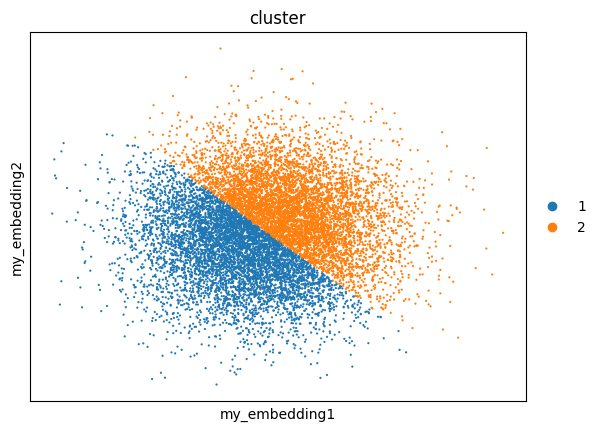

In [ ]:
# Embeddings plotting

adata.obsm["my_embedding"] = np.random.normal(size=(11996, 2))
adata.obs["cluster"] = ["1" if i else "2" for i in (adata.obsm["my_embedding"][:, 1] + adata.obsm["my_embedding"][:, 0] < 0)]

sc.pl.embedding(adata, basis="my_embedding", color="cluster")

In [ ]:
# Subselection in AnnData objects

adata[["TTTGTTGTCTCATTAC-1", "TTTGTTGGTTGGATCT-1"], ["CD4", "CD8A"]]

KeyError: "Values ['TTTGTTGTCTCATTAC-1', 'TTTGTTGGTTGGATCT-1'], from ['TTTGTTGTCTCATTAC-1', 'TTTGTTGGTTGGATCT-1'], are not valid obs/ var names or indices."

In [ ]:
# Layers in AnnData object

adata.layers["counts"] = adata.X.copy()
adata.layers["counts"]

<11996x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 27164608 stored elements in Compressed Sparse Row format>

In [ ]:
# Saving AnnData object

adata.write_h5ad("adata.h5ad")

## Diagnostic plots for cells' QC

In [ ]:
# UMI per cell distribution

counts_per_cell = adata.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell)
counts_per_cell.shape

AttributeError: 'numpy.ndarray' object has no attribute 'A'

<Axes: ylabel='Count'>

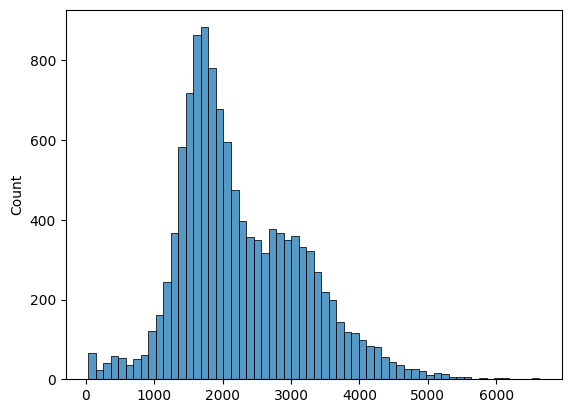

In [ ]:
# Number of genes per cell distribution

genes_per_cell = (adata.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell)

<Axes: ylabel='Count'>

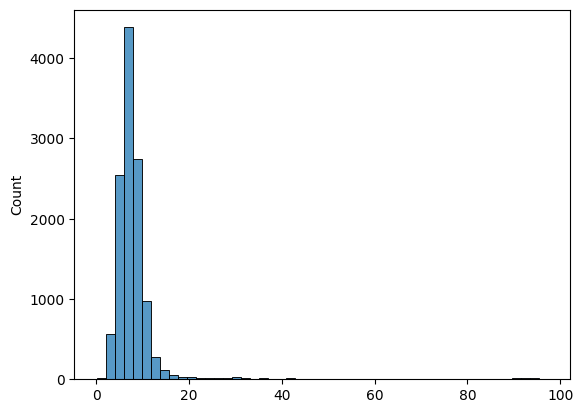

In [ ]:
# % of mitochondrial expression per each cell distribution

mito_counts = adata[:, adata.var["mt"]].X.sum(axis=1).T.A[0]
mito_pct = mito_counts / counts_per_cell * 100
sns.histplot(mito_pct, bins=50)

# Hometask

## Task 1

Number of UMIs per cell in the dataset is distributed (approximately) bimodally. What is the reason for that? Please provide some papers and/or resourses when this phenomenon is described.

Причина, по которой распределение UMI на клетку может быть бимодально, заключается в наличии пустых капель в которых может существовать лишь "бульон" РНК. От данных образцов следует избавляться, выставляя порог UMI на клетку.


Ссылки на статьи:


1. Highly Parallel Genome-wide Expression Profiling of
Individual Cells Using Nanoliter Droplets
http://dx.doi.org/10.1016/j.cell.2015.05.002
2. https://www.10xgenomics.com/analysis-guides/common-considerations-for-quality-control-filters-for-single-cell-rna-seq-data

## Task 2

Using [Cellxgene Portal](https://cellxgene.cziscience.com/) please select the dataset of your scientific interest and perform QC. Are you happy with it? Please save files in `loom` format and describe the features of such a format.

In [1]:
import requests

# URL для скачивания
url = 'https://datasets.cellxgene.cziscience.com/f26b1d6c-798b-4719-93d1-d01072bbe4b0.h5ad'

# Отправка GET-запроса для скачивания файла
response = requests.get(url)

# Проверка успешности запроса
if response.status_code == 200:
    filename = url.split('/')[-1]

    # Сохранение файла в текущую директорию
    with open('Dataset2.h5ad', 'wb') as f:
        f.write(response.content)

    print(f'Файл {filename} успешно скачан.')
else:
    print('Ошибка при скачивании файла.')


Файл f26b1d6c-798b-4719-93d1-d01072bbe4b0.h5ad успешно скачан.


In [9]:
!pip install scanpy
!pip install pyensembl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 537.2/537.2 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 8.8 MB/s eta 0:00:00
  Created wheel for memoized-property: filename=memoized_property-1.0.3-py2.py3-none-any.whl size=4184 sha256=45bbc4a038108c4200ad740d91b4aecb6c8d371bdc359935d28162ea85d8df88
  Stored in directory: /root/.cache/pip/wheels/f7/0f/93/d0497c1248dcc9113cfa09e6ddf52f56

In [3]:
import scanpy as sc

# URL для скачивания
url = 'Dataset2.h5ad'

# Загрузка данных из файла .h5ad и создание объекта AnnData
adata = sc.read_h5ad(url)

# Просмотр информации о загруженных данных
print(adata)


AnnData object with n_obs × n_vars = 10533 × 23272
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'nUMI', 'nGene', 'mitoRatio', 'scDblFinder.score', 'decontX_contamination', 'cell_type', 'assay', 'disease', 'organism', 'sex',

In [4]:
adata.var

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSG00000001460,0.039970,0.048820,0.057396,0.850581,False,STPG1,NCBITaxon:9606,gene,8511
ENSG00000001461,0.039875,0.059367,0.057249,1.037001,False,NIPAL3,NCBITaxon:9606,gene,9396
ENSG00000010072,0.050223,0.063087,0.073751,0.855409,False,SPRTN,NCBITaxon:9606,gene,5906
ENSG00000009780,0.156081,0.208261,0.271665,0.766610,False,FAM76A,NCBITaxon:9606,gene,4046
ENSG00000048707,1.391436,3.137591,5.415922,0.579327,False,VPS13D,NCBITaxon:9606,gene,20768
...,...,...,...,...,...,...,...,...,...
ENSG00000261696,0.000475,0.000475,0.000508,0.934407,False,ENSG00000261696.1,NCBITaxon:9606,gene,1459
ENSG00000126752,0.000285,0.000285,0.000297,0.959390,False,SSX1,NCBITaxon:9606,gene,1223
ENSG00000228459,0.000949,0.002278,0.001055,1.719799,False,LINC01546,NCBITaxon:9606,gene,5109
ENSG00000278057,0.000095,0.000095,0.000094,1.000190,False,TEX28,NCBITaxon:9606,gene,1901


<Axes: ylabel='Count'>

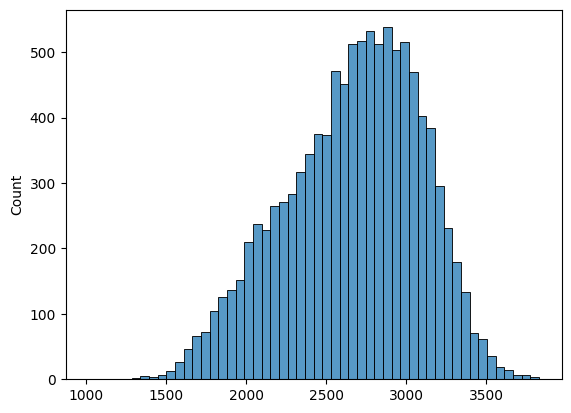

In [5]:
# Построение гистограммы UMI на клетку

import seaborn as sns
import numpy as np

counts_per_cell = adata.X.sum(axis=1).A.T[0]

sns.histplot(counts_per_cell)
#sns.histplot(adata.obs['total_counts'])
#counts_per_cell[:5]

<Axes: ylabel='Count'>

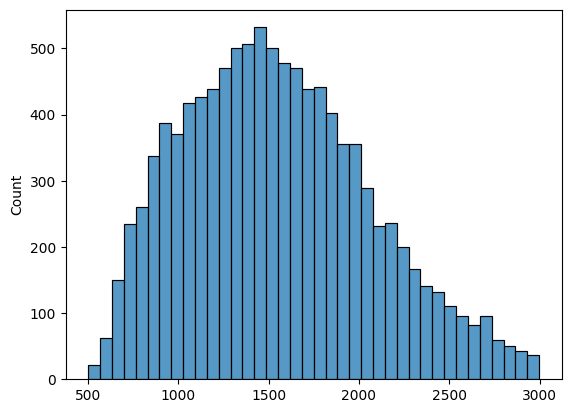

In [6]:
#Гистограмма генов на клетку
genes_per_cell = (adata.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell)

In [11]:
#Выполняем чистку дублетов

sc.pp.scrublet(adata)

Скачанные данные выглядят уже предварительно качественно обработанными и готовыми к использованию

In [14]:
!pip install loompy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52019 sha256=a4bd77e6e34847de9b7c4f0e3ff696fdad3757678aaebe064f4c634c41cd4b00
  Stored in directory: /root/.cache/pip/wheels/2c/22/1f/792a4621bb631e538bf1c21feae9bbaa6b19fd6d6ab382d1fd
Successfully built loompy


In [15]:
# Сохранение объекта AnnData в loom формат
adata.write_loom("output.loom")

The loom file will lack these fields:
{'X_pca', 'X_harmony', 'X_tsne', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations
/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-

Эффективность хранения:

Loom формат основан на HDF5, что обеспечивает высокую эффективность хранения и быстроту доступа к данным.

Универсальность:

Loom может хранить данные различных типов: числовые матрицы (например, выражение генов), аннотации, метаданные и другие связанные с экспериментом данные.

Совместимость с несколькими платформами:

Поддерживается различными инструментами для анализа данных о секвенировании одиночных клеток, включая Scanpy, Seurat, и loompy.

Чтение и запись данных:

Loom формат позволяет быстро читать и записывать большие объемы данных. Данные могут быть загружены частями, что снижает потребление памяти.

Атрибуты:

Loom файлы могут содержать атрибуты, которые обеспечивают дополнительную информацию о данных, например, описание эксперимента, версии инструментов и другие метаданные.

Многомерные данные:

Поддерживает хранение многомерных данных, таких как временные ряды или пространственные данные.

Поддержка ссылок:

Loom формат поддерживает ссылки на другие объекты внутри файла, что позволяет создавать сложные связи между различными наборами данных.